In [3]:
import os
os.environ["OMP_NUM_THREADS"] = "12"
os.environ["MKL_NUM_THREADS"] = "12"
os.environ["NUMEXPR_NUM_THREADS"] = "12"




In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimage 

from mpl_toolkits.mplot3d import Axes3D

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
image=mpimage.imread('/home/user/Coursera/Coursera_assaingment/Clustering_assaingment.jpg')

In [7]:
original_img=image

(np.float64(-0.5), np.float64(959.5), np.float64(717.5), np.float64(-0.5))

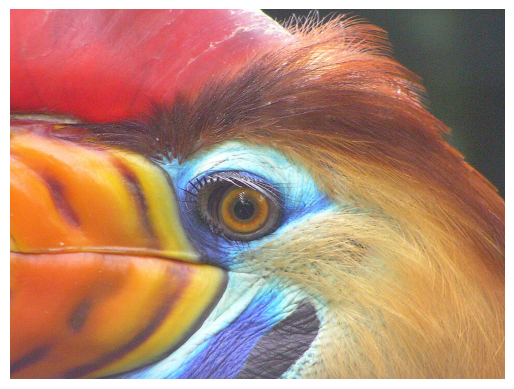

In [8]:
plt.imshow(image)
plt.axis("off")

In [9]:
reshaped_image=image.reshape(image.shape[0]*image.shape[1],3)

In [10]:
reshaped_image[:5,:]

array([[241, 100, 109],
       [238,  96, 108],
       [242, 102, 115],
       [233,  92, 108],
       [240,  97, 115]], dtype=uint8)

In [11]:
X_img=reshaped_image/255

In [12]:
# UNQ_C1
# GRADED FUNCTION: find_closest_centroids

def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)
    indx=None
    dis=np.inf
    ### START CODE HERE ###
    for i in range(len(idx)):
        for j in range(K):
            if dis>=np.linalg.norm(X[i]-centroids[j]):
                dis=np.linalg.norm(X[i]-centroids[j])
                indx=j
        idx[i]=indx
        dis=np.inf       
            
            
        
     ### END CODE HERE ###
    
    return idx
    


In [13]:
# UNQ_C2
# GRADED FUNCTION: compute_centroids

def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    ### START CODE HERE ###
    
    for i in range(K):
        points = X[idx==i]
        centroids[i]=np.mean(points,axis=0)
    
        
    ### END CODE HERE ## 
    
    return centroids

In [14]:
# You do not need to implement anything for this part

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

In [15]:
# You do not need to modify this part

def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

In [16]:
import time
start = time.time()



# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16
max_iters = 10

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this can take a couple of minutes depending on K and max_iters
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)


K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [17]:
end = time.time()
print("Execution time:", end - start, "seconds")

Execution time: 200.19578576087952 seconds


In [23]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 
reshaped=X_recovered
# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

In [25]:
print("After reshaped:",{X_recovered.shape})
print("Before reshaped:",{reshaped.shape})

After reshaped: {(718, 960, 3)}
Before reshaped: {(689280, 3)}


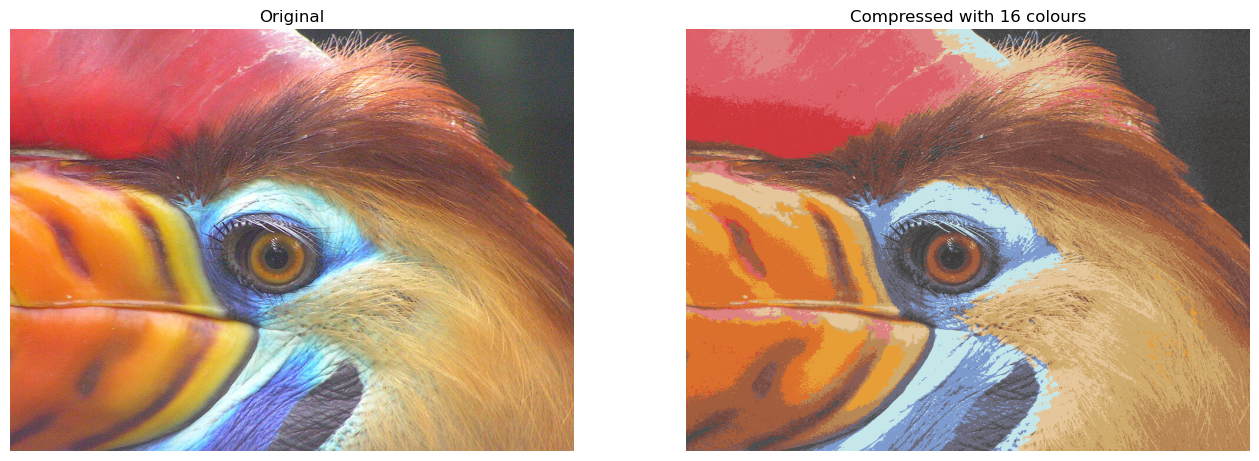

In [20]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()